<a href="https://colab.research.google.com/github/advcloud/colabtest/blob/main/yolov5wandb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q wandb
api_key = ""
!wandb login $api_key
projectn ='yolov5wandb1'
projectn1 =projectn+'/exp/weights/best.pt'
projectn2 ='/content/gdrive/My\ Drive/weights/'+projectn+'.pt'
DATASETk1 ="https://app.roboflow.com/ds/"

     |████████████████████████████████| 1.8 MB 14.5 MB/s 
     |████████████████████████████████| 181 kB 72.4 MB/s 
     |████████████████████████████████| 145 kB 73.2 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [2]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12088, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 12088 (delta 21), reused 16 (delta 7), pack-reused 12047
Receiving objects: 100% (12088/12088), 11.86 MiB | 24.63 MiB/s, done.
Resolving deltas: 100% (8379/8379), done.
/content/yolov5


In [3]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 596 kB 14.9 MB/s 
Setup complete. Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [4]:
# Export code snippet and paste here
%cd /content
#!curl -L "https://public.roboflow.ai/ds/vJUg9kAnOG?key=YOUR DATASET HERE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
!curl -L $DATASETk1 > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1763      0 --:--:-- --:--:-- --:--:--  1763
100 13.1M  100 13.1M    0     0  10.9M      0  0:00:01  0:00:01 --:--:-- 10.9M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/0062698133f26395_jpg.rf.e9b2569993bc01007ef55fefaf35bb06.jpg  
 extracting: test/images/00a20986a3abbd4c_jpg.rf.50b1ca7f159c4dfec2c937d46c5ebc16.jpg  
 extracting: test/images/020c527f9ca920b0_jpg.rf.888b13fd9f4fd6f226cee57f1d261aea.jpg  
 extracting: test/images/021aaa0943f6d074_jpg.rf.d9f8cf9240b41583276ac363cde8e8dd.jpg  
 extracting: test/images/06004a3ace5bcc1a_jpg.rf.5f9d9dc81f50aa0ac0b49cf21b60c072.jpg  
 extracting: test/images/07def16b30a3e9fe_jpg.rf.e060

In [5]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['Teapot']

In [6]:
%cd /content/yolov5

/content/yolov5


In [7]:
#!python train.py --img 640 --batch 8 --epochs 30 --data ../data.yaml --weights yolov5s.pt --device 0 --cfg ./models/yolov5s.yaml
!python train.py --img 640 --batch 8  --data ../data.yaml --epochs 3  --project $projectn --weights yolov5s.pt --device 0 --cfg ./models/yolov5s.yaml

wandb: Currently logged in as: clair (claireye). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5wandb1, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-233-g7433d38 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5

In [8]:
%ls $projectn1

yolov5wandb1/exp/weights/best.pt


In [9]:
!python detect.py --weights $projectn1 --conf 0.4 --source ../test/images/

detect: weights=['yolov5wandb1/exp/weights/best.pt'], source=../test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-233-g7433d38 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/60 /content/test/images/0062698133f26395_jpg.rf.e9b2569993bc01007ef55fefaf35bb06.jpg: 640x640 Done. (0.013s)
image 2/60 /content/test/images/00a20986a3abbd4c_jpg.rf.50b1ca7f159c4dfec2c937d46c5ebc16.jpg: 640x640 Done. (0.013s)
image 3/60 /content/test/images/020c527f9ca920b0_jpg.rf.888b13fd9f4fd6f226cee57f1d261aea.jpg: 640x640 Done. (0.013s)
image 4/60

GROUND TRUTH TRAINING DATA:


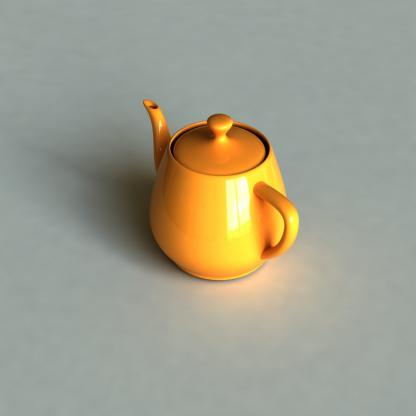

In [10]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='../test/images/021aaa0943f6d074_jpg.rf.d9f8cf9240b41583276ac363cde8e8dd.jpg', width=900)

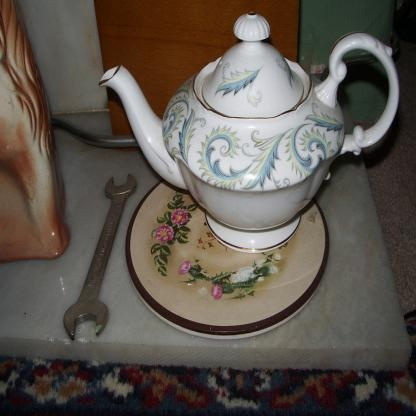

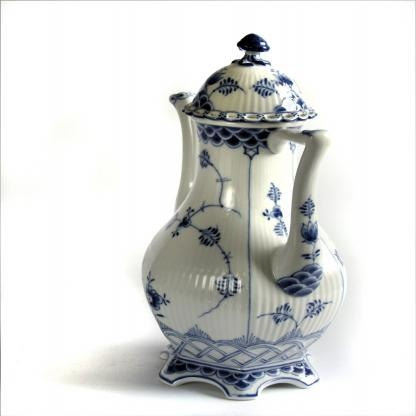

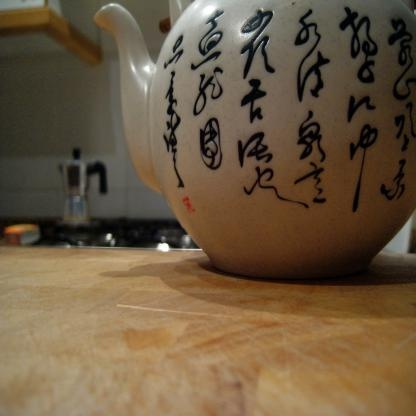

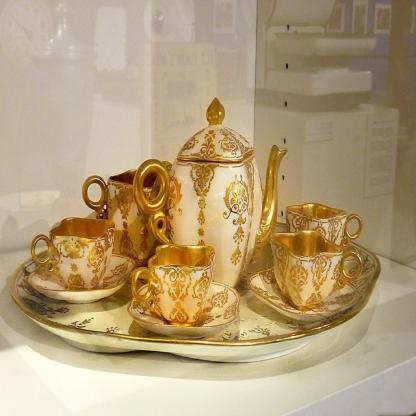

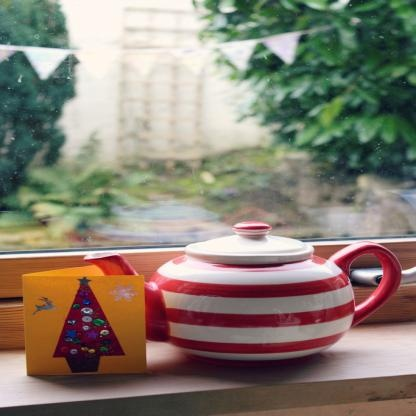

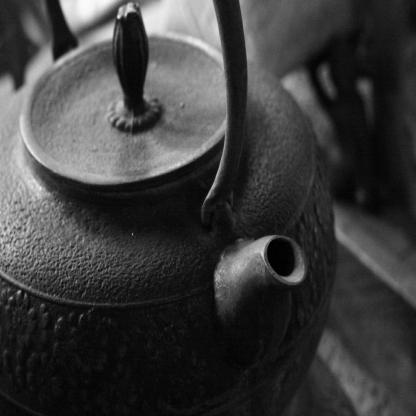

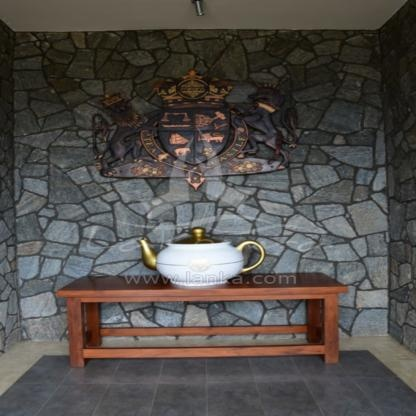

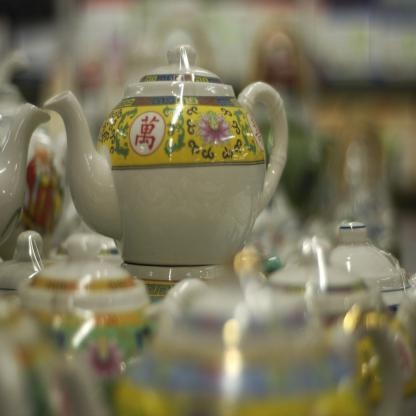

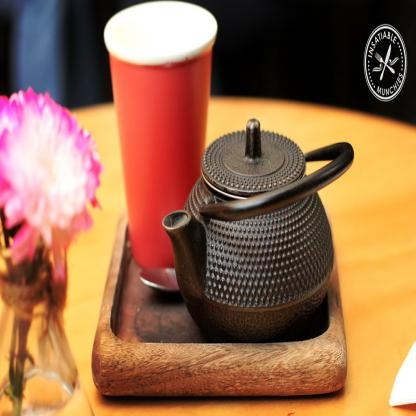

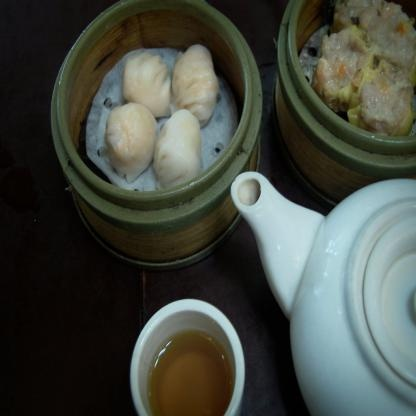

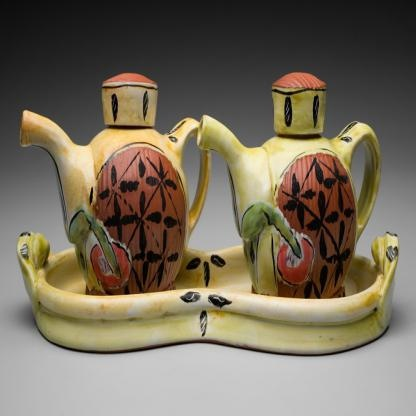

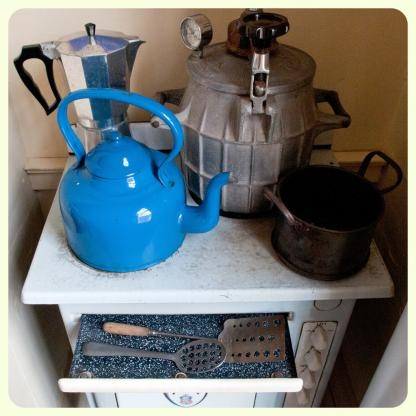

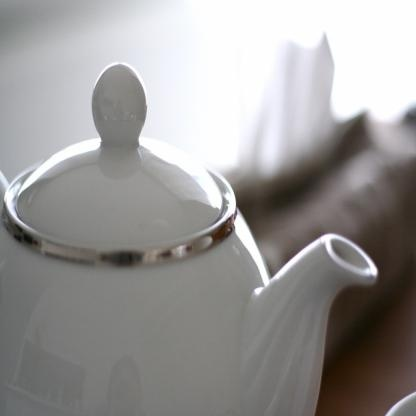

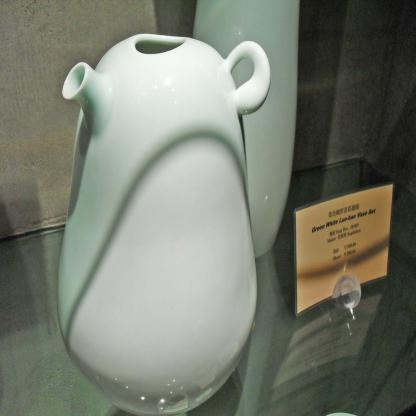

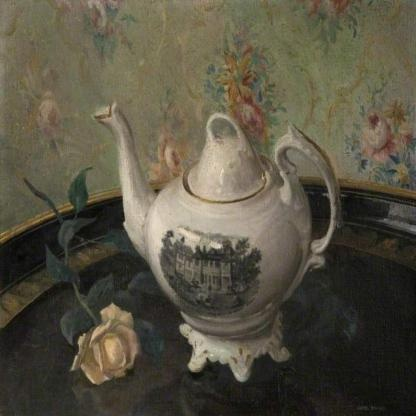

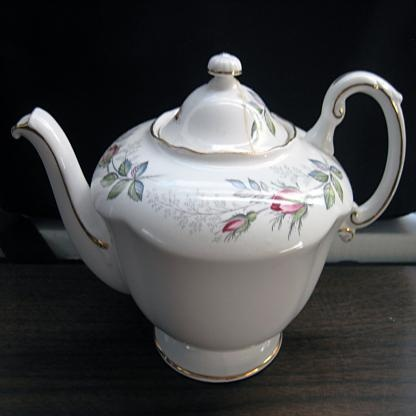

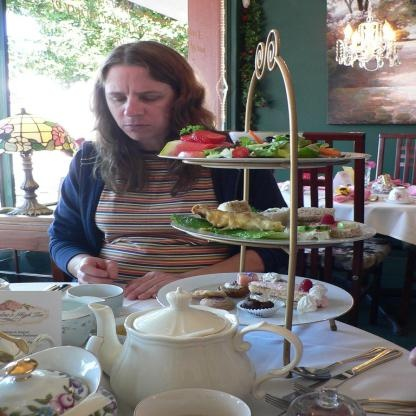

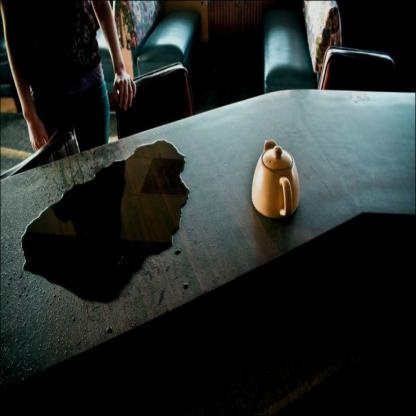

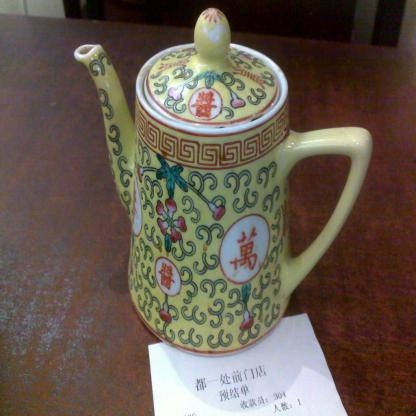

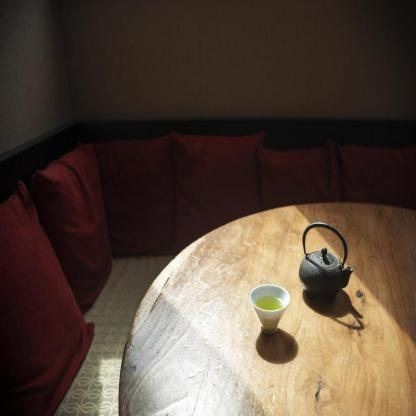

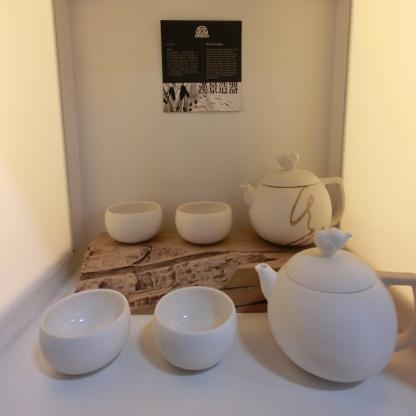

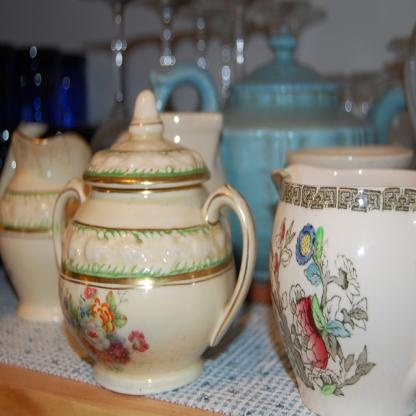

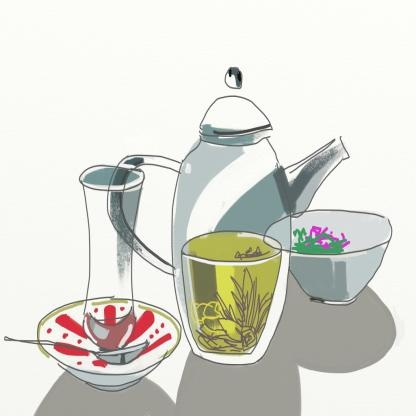

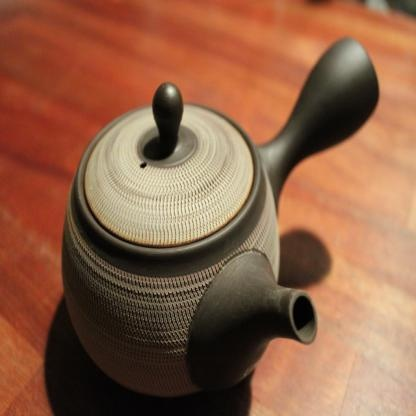

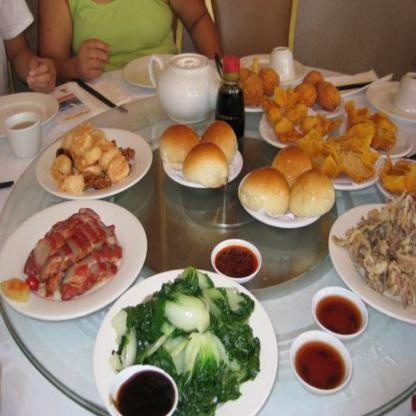

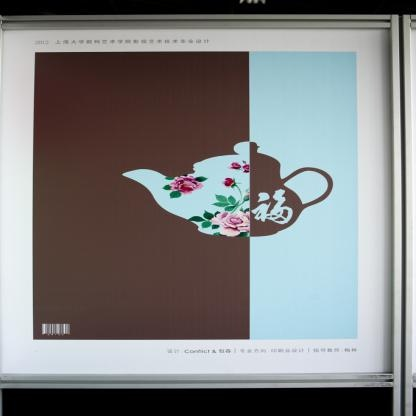

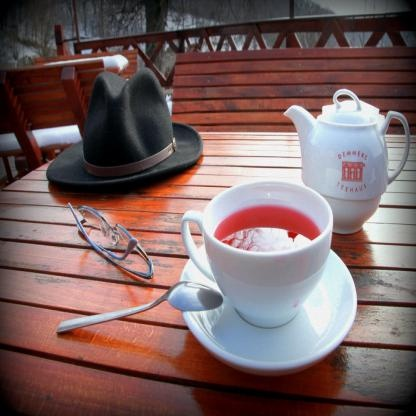

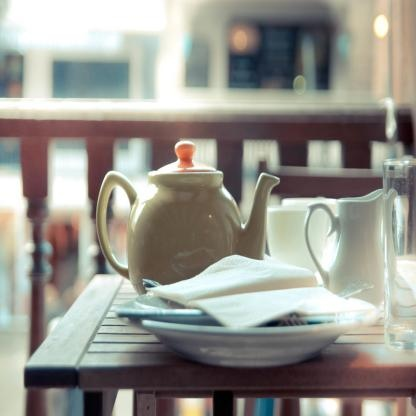

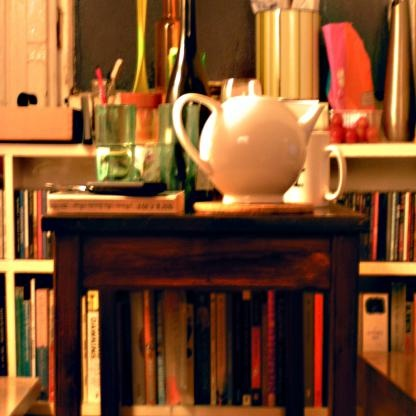

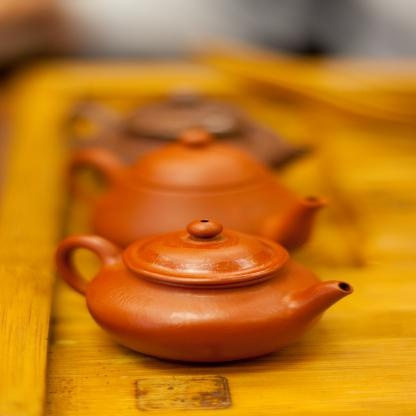

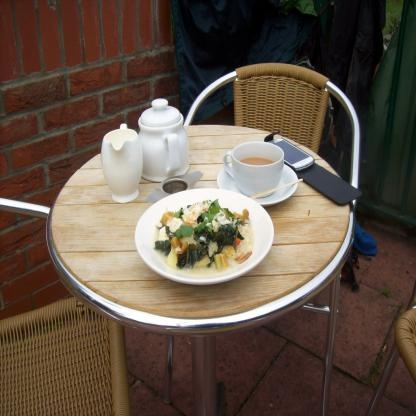

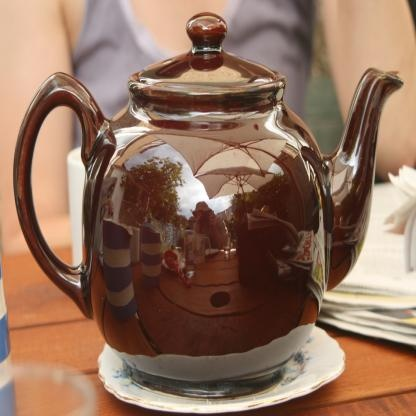

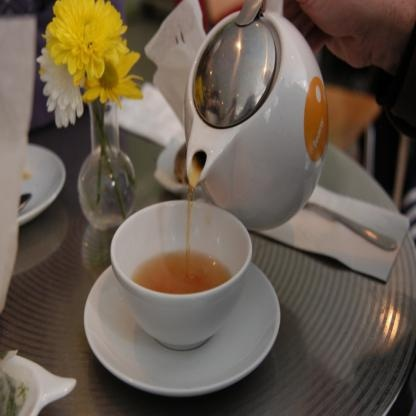

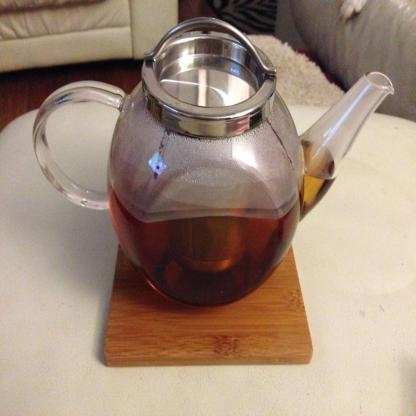

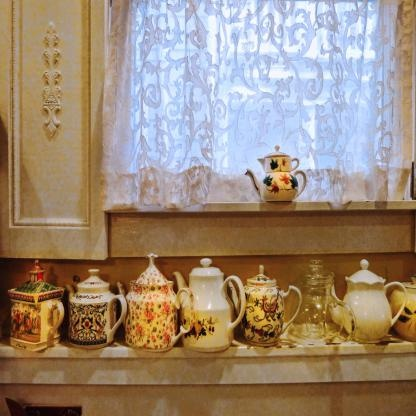

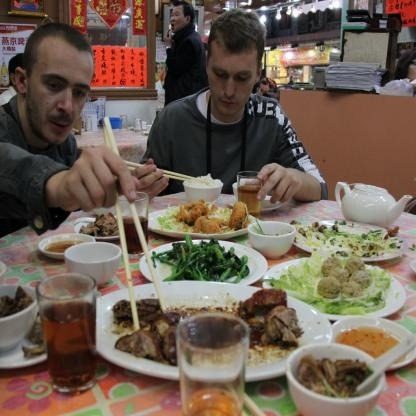

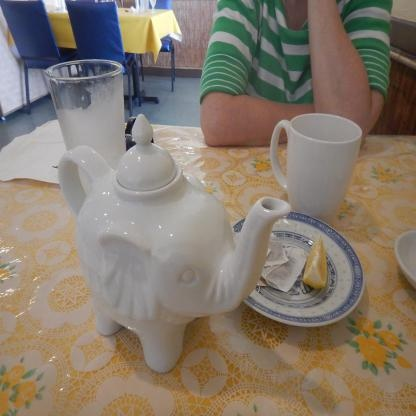

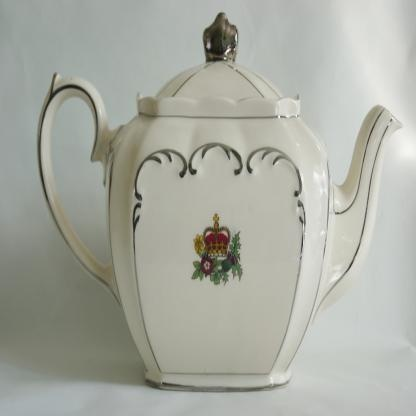

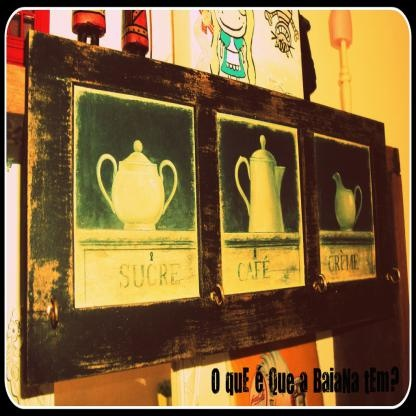

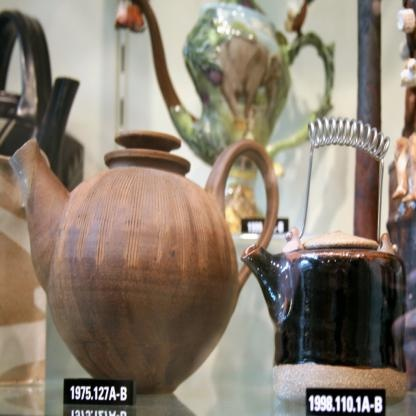

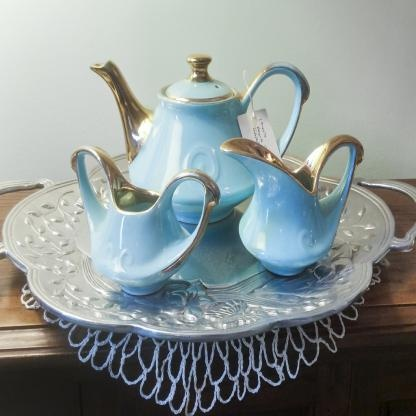

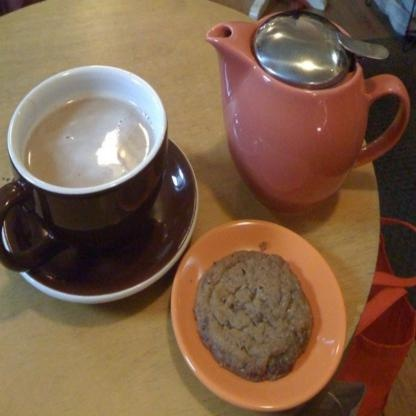

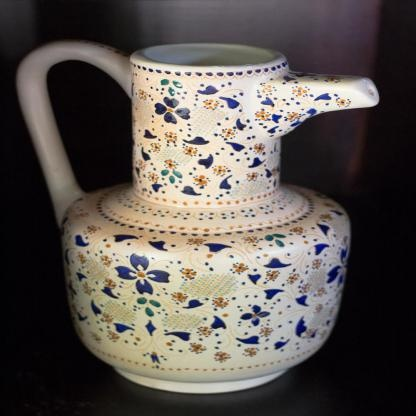

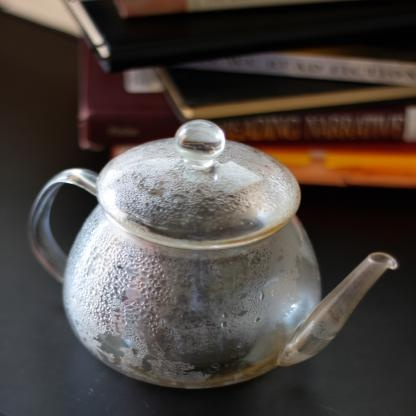

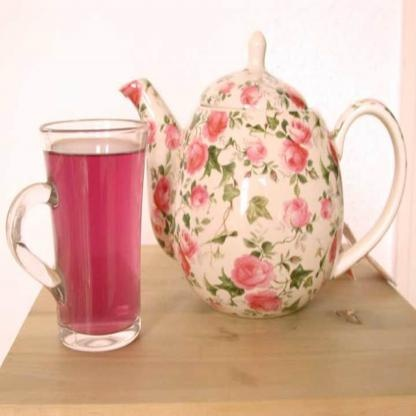

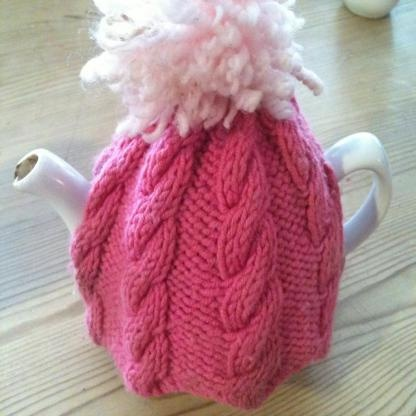

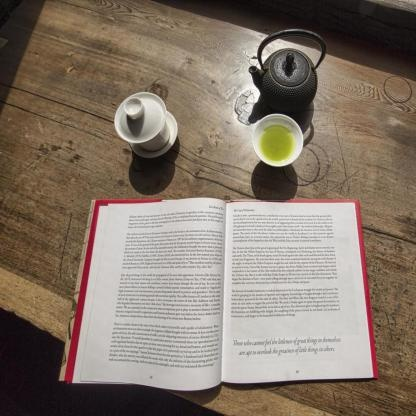

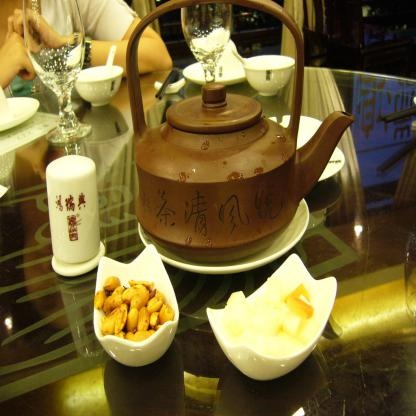

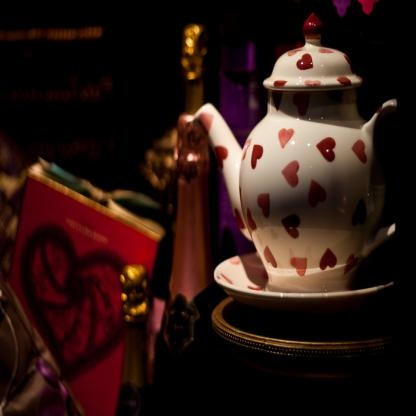

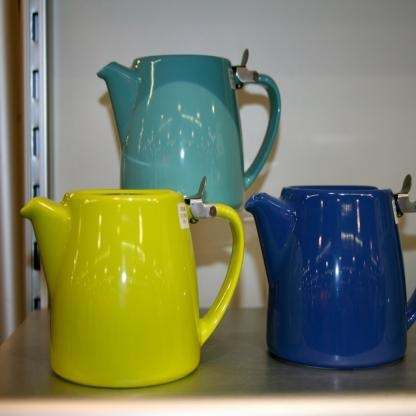

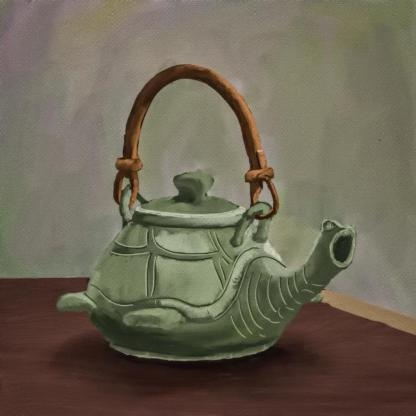

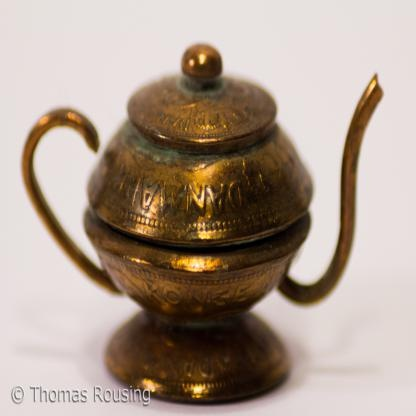

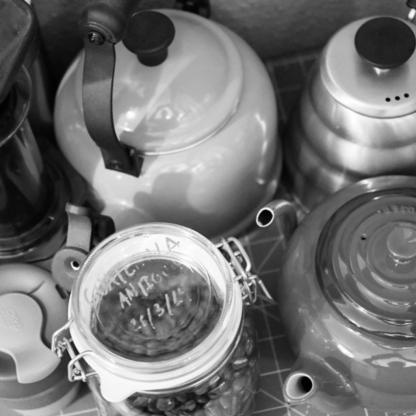

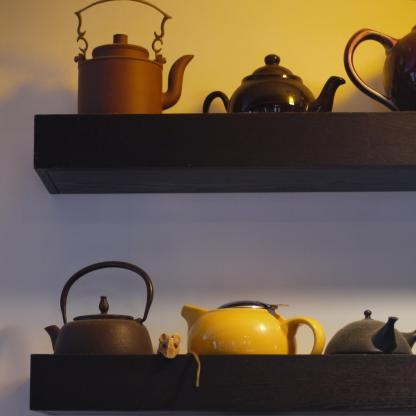

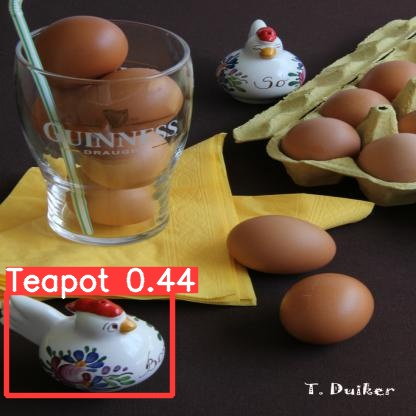

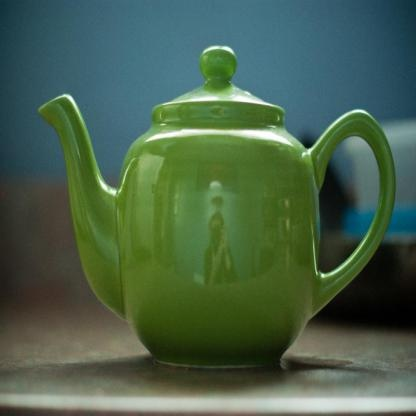

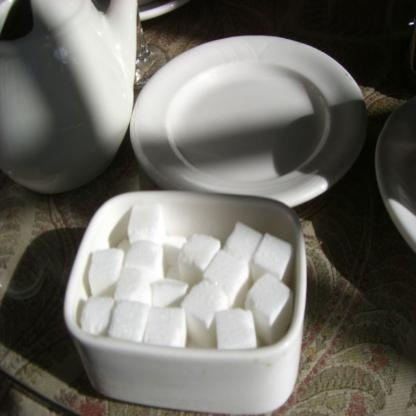

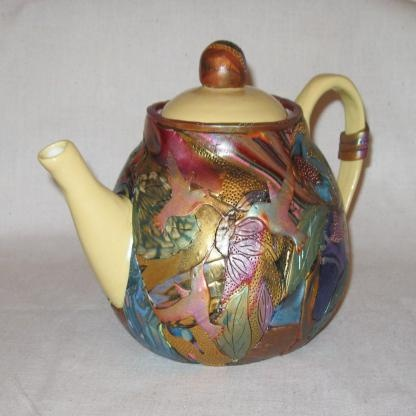

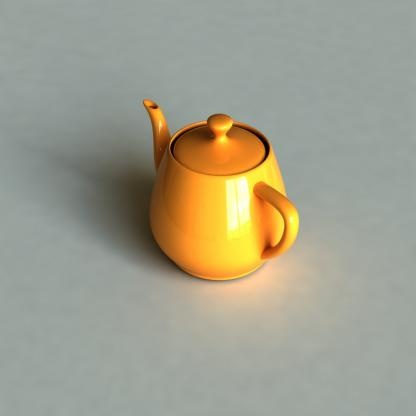

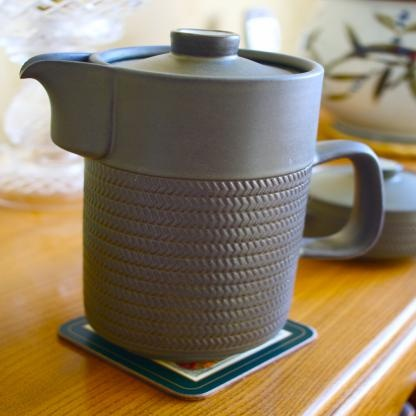

In [11]:
#display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
%ls /content/gdrive/My\ Drive/weights/

best_overall.pt  yolov5wandb1.pt


In [14]:
%cp $projectn1 $projectn2